In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#Import telco customer data 
df= pd.read_csv("C:\\Users\\Laptop\\Untitled Folder 1\\Datasets\\Telco-Customer-Churn.csv")

In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [60]:
df.drop("customerID", axis=1, inplace=True)

In [61]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [62]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

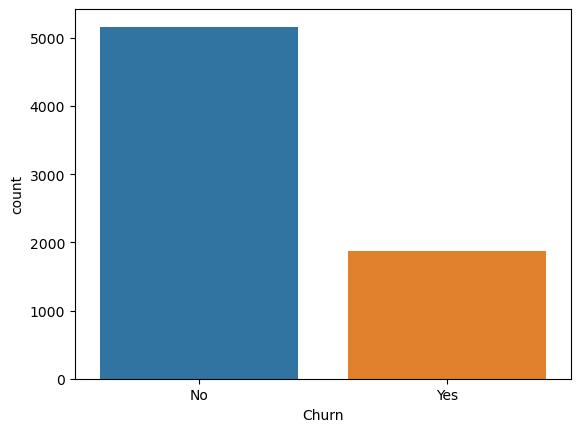

In [63]:
sns.countplot(x="Churn", data= df)

In [64]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [65]:
df.shape

(7032, 20)

In [66]:
#print unique value for all coloumns
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [67]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [68]:
#Some of the columns have no internet service or no phone service, that can be replaced with a simple No
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [69]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [70]:
#Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [71]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [72]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [73]:
#covert other columns to dummies columns
df= pd.get_dummies(data=df, columns=['gender','InternetService','Contract','PaymentMethod'])


In [74]:
df.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [75]:
corr_df= df.corr()
corr_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,0.325288,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325
TechSupport,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.100421,0.354458,0.293705,0.332850,1.000000,...,0.312183,-0.020299,-0.335695,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631


In [76]:
corr_df["Churn"].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity                            -0.171270
TechSupport                               -0.164716
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
gender_Male                               -0.008545
gender_Female                              0.008545
PhoneService                               0.011691
MultipleLines                              0.040033
StreamingMov

In [77]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
gender_Female: [1 0]
gender_Male: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [78]:
#Scale this numeric value
from sklearn.preprocessing import MinMaxScaler

In [79]:
scale_col=['tenure','MonthlyCharges','TotalCharges']
scaler= MinMaxScaler()
df[scale_col]= scaler.fit_transform(df[scale_col])

In [80]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
Streaming

In [81]:
len(df)

7032

In [82]:
#train test split
X = df.drop('Churn',axis='columns')
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [83]:
df.shape

(7032, 28)

In [84]:
X_train.shape

(5274, 27)

In [85]:
#Build a model (ANN) in tensorflow/keras
from tensorflow_addons import losses 
import tensorflow as tf
from tensorflow import keras

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(27, input_dim=27, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    return y_preds

In [88]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.7450
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7857
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7905
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.7931
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7979
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7964
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8005
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8007
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8030
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4134 - accura

165/165 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8273
Epoch 82/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8275
Epoch 83/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8273
Epoch 84/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8299
Epoch 85/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8276
Epoch 86/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8271
Epoch 87/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8314
Epoch 88/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8297
Epoch 89/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8320
Epoch 90/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 

In [89]:
#Mitigating Skewdness of Data

In [90]:
#Method 1: Undersampling

In [127]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [91]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [137]:
len(df_class_0)

5163

In [92]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [93]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [94]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [95]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.6455
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7602
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7756
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8194
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8217
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8201
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8224
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8264
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8244
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8237
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8234
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8201
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8271
Epoch 93/100


In [97]:
#Method2: Oversampling

In [145]:
len(df1_class1)
len(df_class_1.sample(count_class_0, replace=True))

5163

In [98]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [99]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [100]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [101]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7258
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7604
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7643
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7692
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7705
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7722
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7738
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7762
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7765
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4640 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8340
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8318
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8327
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8332
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8357
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8356
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8364
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8358
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8380
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 

In [103]:
#Method3: SMOTE
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [108]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [109]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7444
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7764
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7808
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7820
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7840
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7868
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.7952
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7990
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8045
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4222 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8536
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8570
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8506
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8541
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8591
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8548
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8562
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8592
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.8587
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3262 - accuracy: 

In [110]:
#Method4: Use of Ensemble with undersampling

In [111]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [112]:
# Regain Original features and labels
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [114]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [115]:
df1 = X_train.copy()
df1['Churn'] = y_train

In [116]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
683,0,0,0,0.000000,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2441,0,0,0,0.239437,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
1675,0,1,1,0.774648,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2215,0,1,0,1.000000,1,0,1,1,0,1,...,0,0,0,0,1,1,0,0,0,0
2837,0,0,0,0.042254,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0


In [117]:
df1_class0 = df1[df1.Churn==0]
df1_class1 = df1[df1.Churn==1]

In [118]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [120]:
X_train, y_train = get_train_batch(df1_class0, df1_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6252 - accuracy: 0.6816
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7602
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7702
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7692
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7709
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7763
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7732
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8171
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8147
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8177
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8177
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8177
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8181
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8204
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8144
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8164
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8164
Epoch 93/100


In [122]:
X_train, y_train = get_train_batch(df1_class0, df1_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6422 - accuracy: 0.6395
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7562
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7572
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7609
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7689
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8241
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8227
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8237
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8214
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8217
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8201
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8207
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8237
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8247
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8224
Epoch 93/100


In [123]:
X_train, y_train = get_train_batch(df1_class0, df1_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6272 - accuracy: 0.6448
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7658
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7624
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7639
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7700
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7708
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7757
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7769
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7799
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7803
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8338
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8406
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8395
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8380
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8357
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8410
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8463
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8425
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8463
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8440
Epoch 93/100


In [124]:
len(y_pred1)

1407

In [125]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [126]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

